# ADVANCED STASTICS:  Laboratory Session 3

## Baci Ema 2050726

## Imports

In [29]:
# RUN TWICE TO REMOVE THE WARNING

suppressPackageStartupMessages({
    library(ggplot2)
    library(reshape2)
    library(magick)
    library(tibble)
    library(readr)
    library(tidyverse)
    library(sqldf)
    library(dplyr)
    library(purrrlyr)
    library(zoo)
    library(tibbletime)
})


## EXERCISE 1
The triangular distribution, in the interval (a, b), is given by the following:

\begin{equation}
    \begin{cases}
        \ \frac{2(x − a)}{(b − a)(c − a)}\ \ \ \text when \ \  a ≤ x < c \\ 
        \ \frac{2(b − x)}{(b − a)(b − c)}\ \ \ \text when  \ \  c ≤ x ≤ b \\
        \ 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \text otherwise \\
    \end{cases}
\end{equation}

where c ∈ [a, b].

a) plot the function, given the interval (a, b)

In [2]:
a_         <- 1.
b_         <- 2.
c_         <- mean(c(a_,b_)) # symmetric distribution choosen

pdf1 <- function(x, a = a_, b = b_, c= c_){
    
    if (x>= a & x< c){
        f<- 2*(x-a)/((b-a)*(c-a))
    }
    else if (x>= c & x<= b){
        f<- 2*(b-x)/((b-a)*(b-c))
    }
    else {
        f <- 0
    }
    return(f)
}

In [3]:
x          <- seq(0.5, 2.5 , 0.001)
pdf_values <- c()
for (i in x)
{
    pdf_values <- c( pdf_values, pdf1(i) )
}


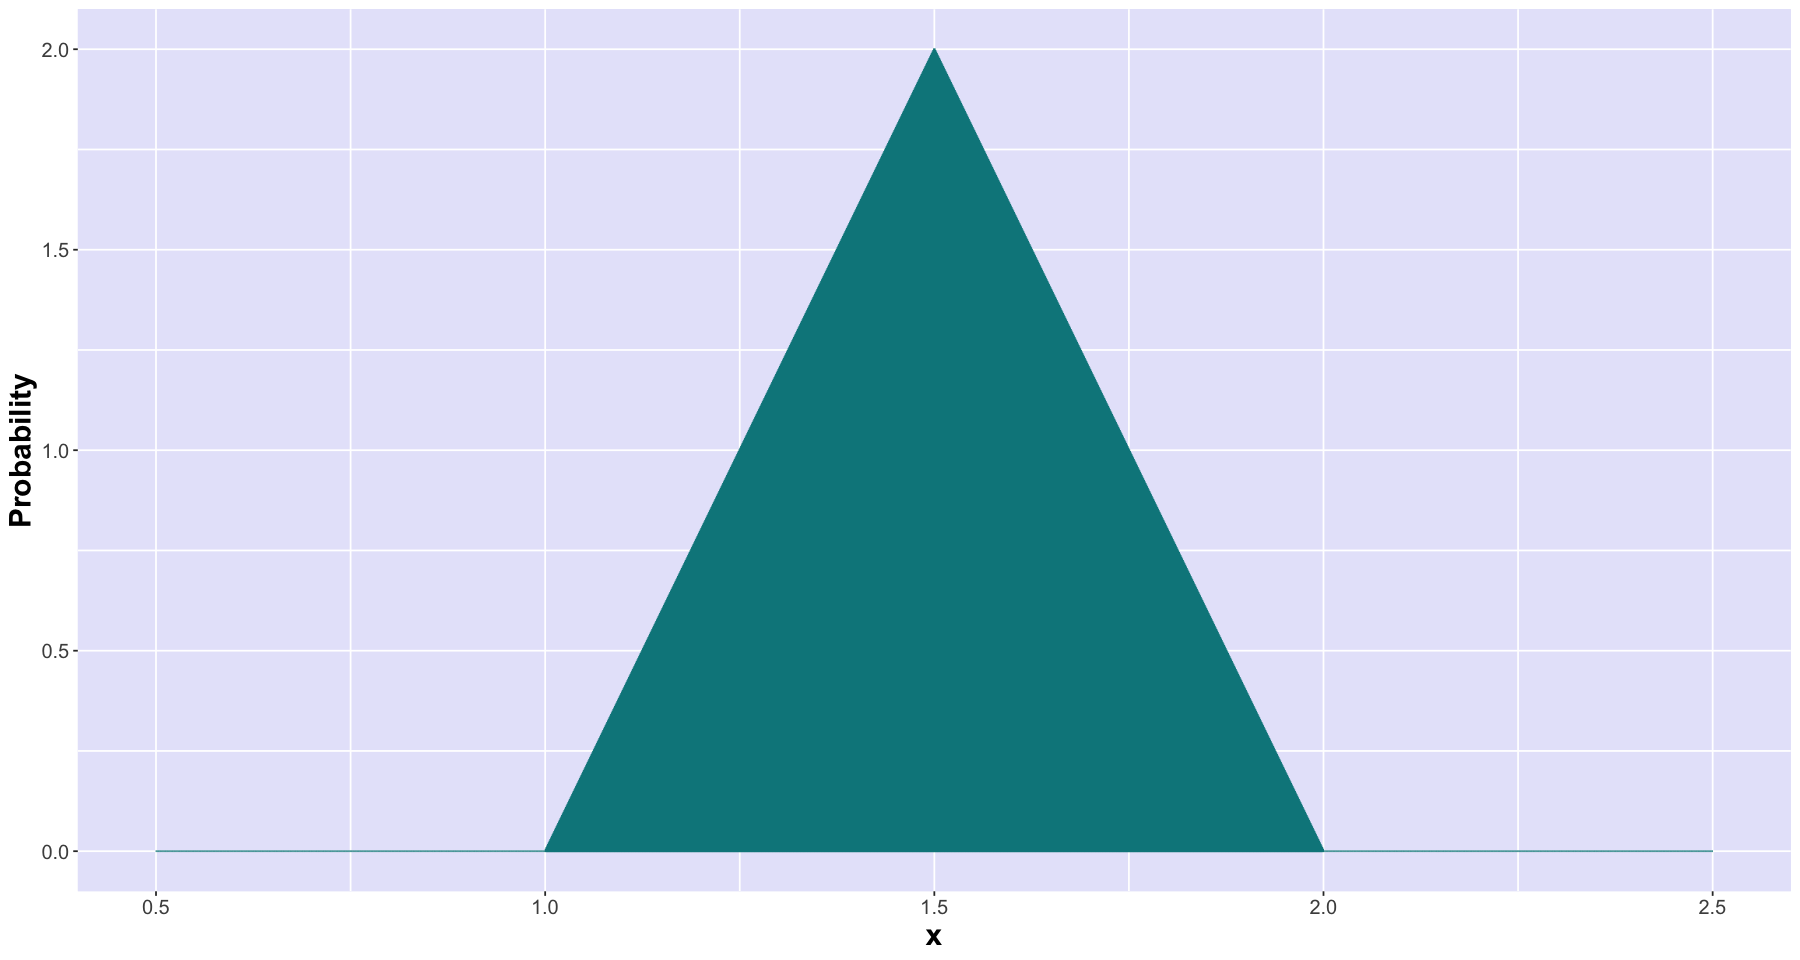

In [4]:
options(repr.plot.width = 15, repr.plot.height = 8, las = 1)
# Barplot
barplot_pdf <- qplot( ) + 
                  geom_bar( aes(x = x, y = pdf_values), stat = "identity", 
                           color = 'turquoise4', fill = 'turquoise4') 

layout <- theme( axis.text  = element_text(size = 12),
                 axis.title = element_text(size = 18, face= "bold"),
                 panel.background = element_rect(fill     = 'lavender',
                                                 colour   = "lavender",
                                                 size     = 0.5, 
                                                 linetype = "solid"),
                 panel.grid.major = element_line(size     = 0.5, 
                                                 linetype = 'solid',
                                                 colour   = "white"), 
                 panel.grid.minor = element_line(size     = 0.5, 
                                                 linetype = 'solid',
                                                 colour   = "white"))

labels  <- labs( x = 'x',
                 y = 'Probability')
barplot_pdf <- barplot_pdf + layout + labels

barplot_pdf

b) And write an algorithm to generate random numbers from the triangular distribution

In [5]:
cdf1 <- function(x, a = a_, b = b_, c= c_){
    
    if (x < a) {
        f <- 0
    }
 
    else if (x>= a & x< c){
        f<-  ((x -a)^2)/((b-a)*(c-a))
    }
    else if (x>= c & x<= b){
        f<- 1 - ((x-b)^2/((b-a)*(c-a)))
    }
    
   else if (x>b) {f <- 1}
    return(f)
    }

In [6]:
x          <- seq(0.5, 2.5 , 0.001)
cdf_values <- c()
for (i in x)
{
    cdf_values <- c(cdf_values, cdf1(i))    
}


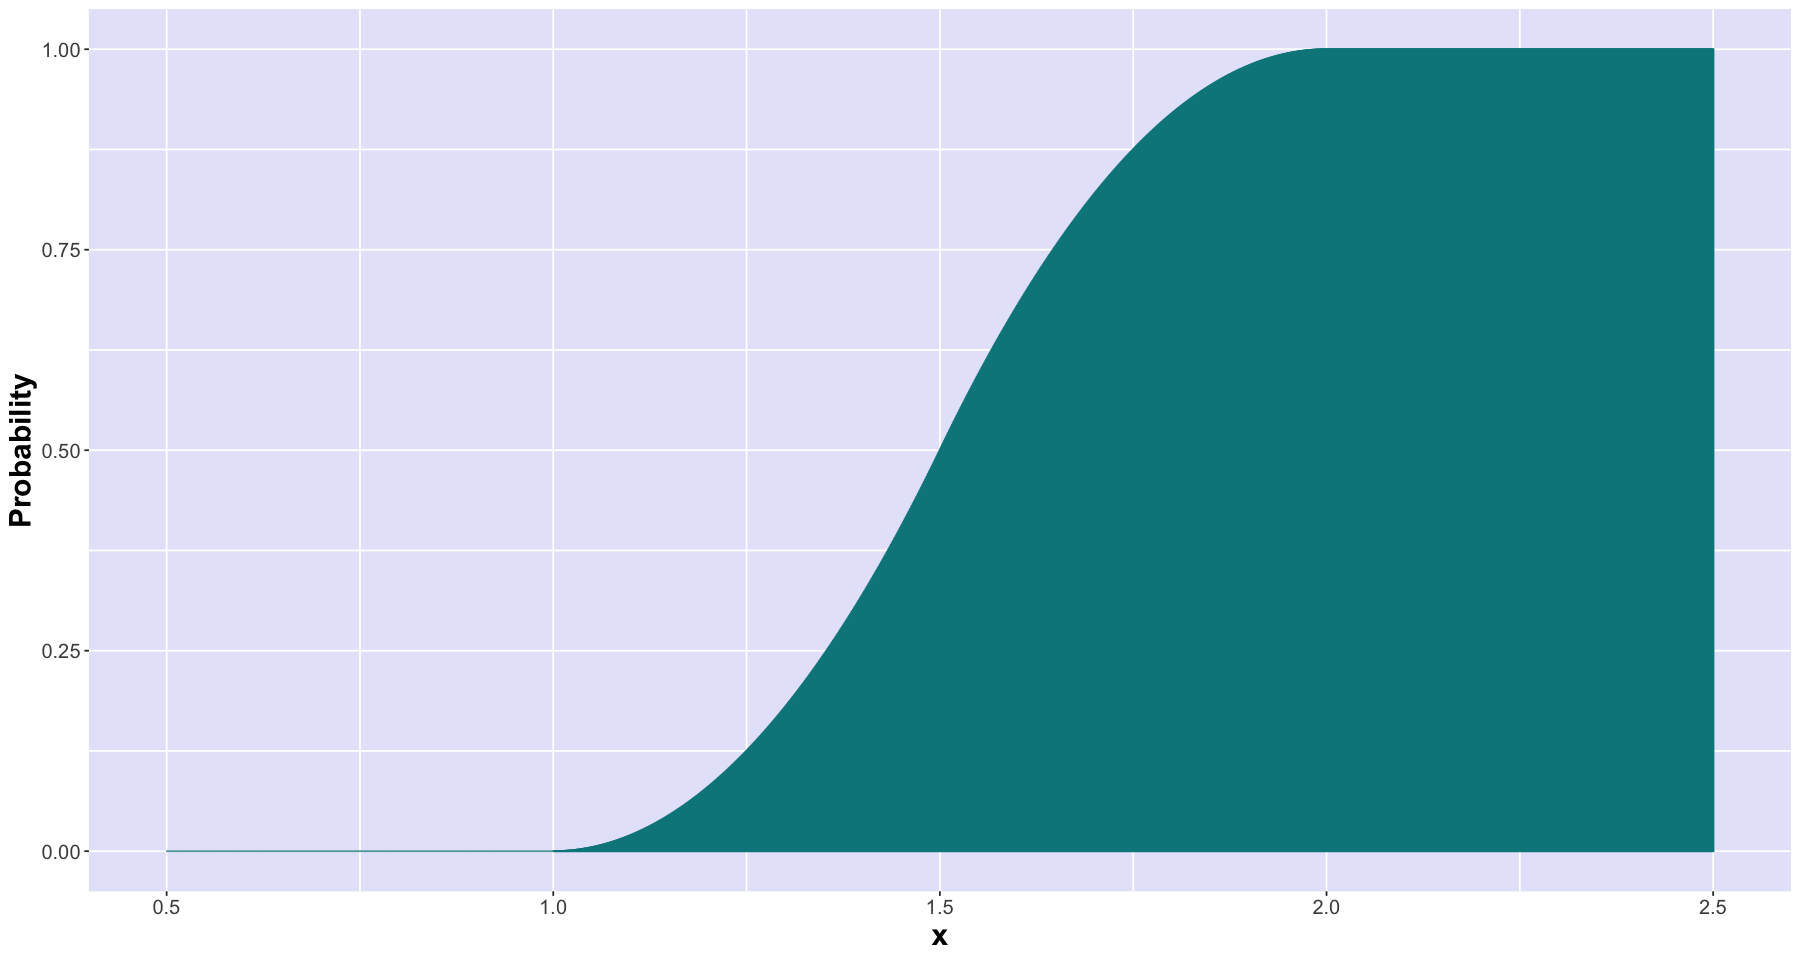

In [7]:
# Barplot
options(repr.plot.width = 15, repr.plot.height = 8, las = 1)

barplot_cdf <- qplot( ) + 
            geom_bar( aes(x = x, y = cdf_values ), stat = "identity", 
            color = 'turquoise4', fill = 'turquoise4') 

barplot_cdf <- barplot_cdf + layout + labels

barplot_cdf

In [8]:
# ICDF
inverse <- function(fn, interval = NULL, lower = min(interval), upper = max(interval), ...){
    Vectorize(function(y){
        uniroot(f=function(x){fn(x)-y}, lower=lower, upper=upper, ...)$root
    })
}

icdf1 <- inverse(cdf1, lower=1, upper=2)

# RANDOM GENERATOR 

random1 <- function( N ){
    step     <- 1/N
    x1       <- seq(0+step, 1-step , step)
    icdf_val <- c(1)
    for (i in x1)
    {
        icdf_val <- append(icdf_val, icdf1(i))
    }

    x1   <- c(0.0-step, x1)
    
    return (icdf_val)
}
    

c) Generate $10^4$ random number from the distribution, show them in an histogram and
superimpose the analytical curve

In [9]:
random_values <- random1(10^4)
pdf_values_normalized <- pdf_values*0.03*10^4

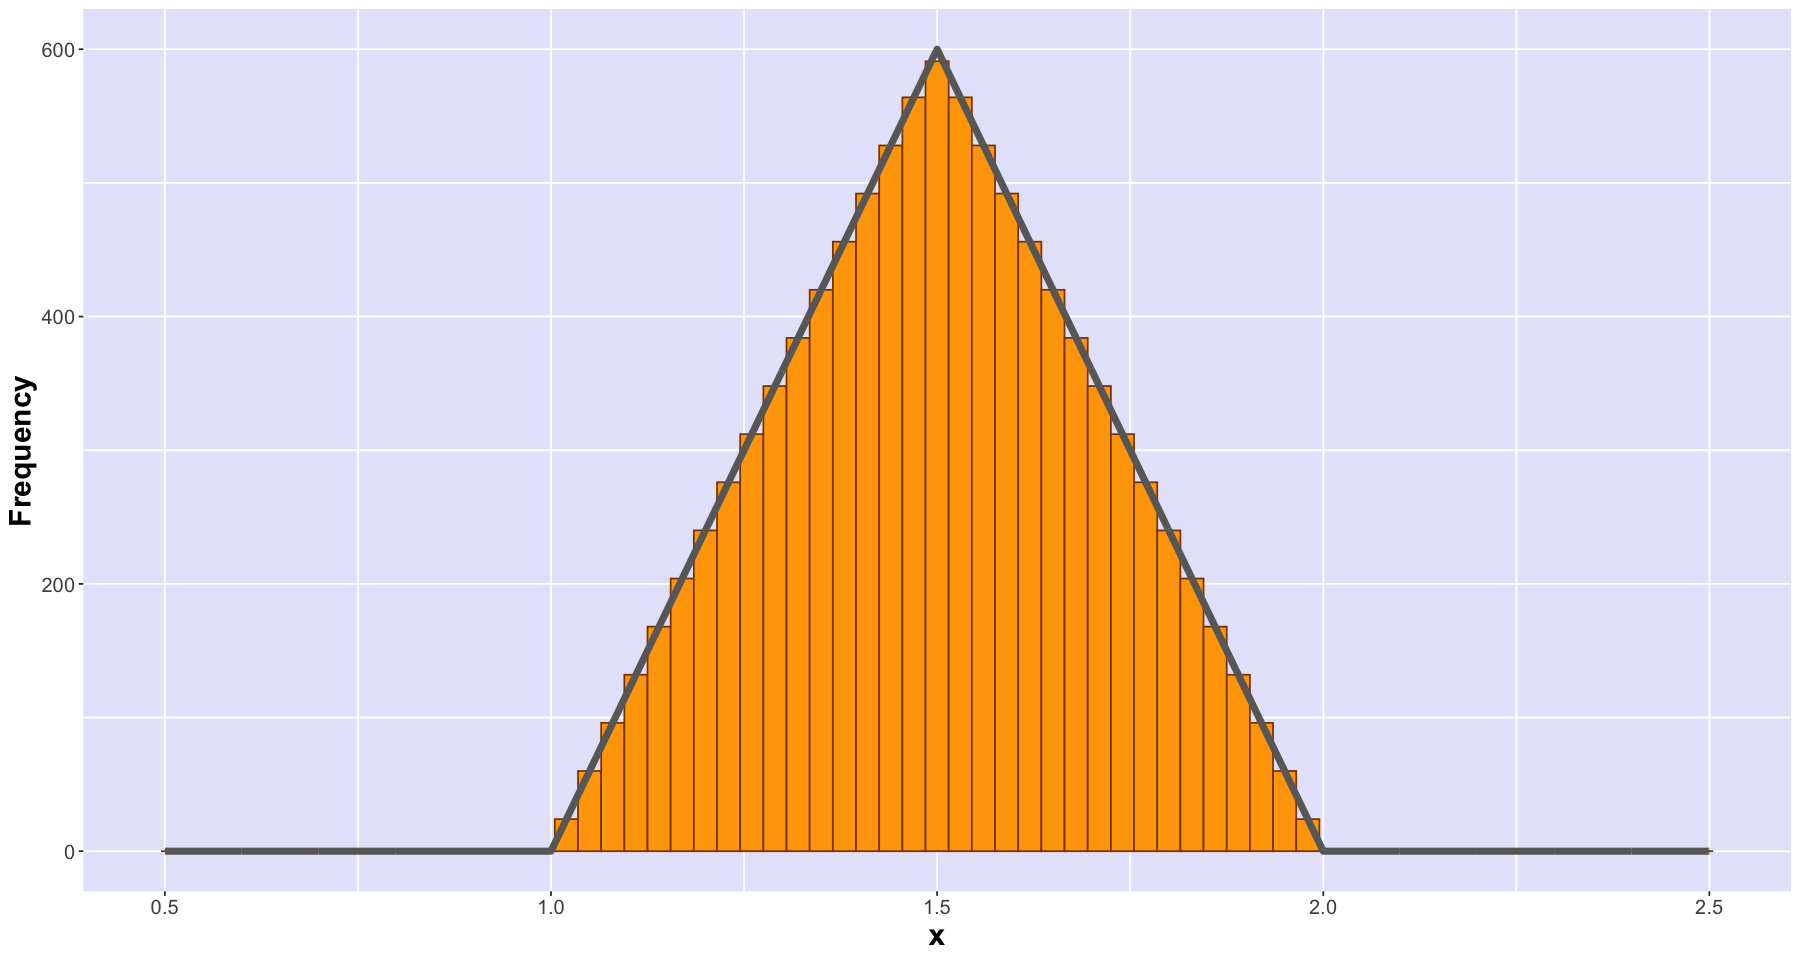

In [10]:
final_plot <- qplot( ) + 
            geom_histogram( aes(x = random_values), fill = 'orange', col = 'darkorange4', binwidth = 0.03) +
                stat_bin(bins = 100)+
                geom_line( aes(x = x, y = pdf_values_normalized), stat = "identity", 
                color  = 'dimgray', size = 2)
                                  

labels  <- labs( x = 'x',
                 y = 'Frequency')

final_plot <- final_plot + layout + labels

final_plot

## Exercise 2 - Markov’s inequality

Markov’s inequality represents an upper bound to probability distributions:
$$
P(X ≥ k) ≤ \frac{E[X]}{k}  
$$
for k > 0

Having defined a function
$$
G(k) = 1 − F(k) ≡ P(X ≥ k)
$$
plot G(k) and the Markov’s upper bound for

- a) the exponential, Exp(λ = 1), distribution function
- b) the uniform, U (3, 5), distribution function
- c) the binomial, Bin(n = 1, p = 1/2), distribution function
- d) a Poisson, Pois(λ = 1/2), distribution function

In [11]:
E1 <- 1            # lambda
E2 <- mean(c(3,5)) # mean value between limits
E3 <- 1 * 0.5      # n*p
E4 <- 0.5          # lambda

step = 0.05
k <- seq(0.5, 10 , step) 

Exponential_distr <- c( 1 - pexp(k, 1 )) 
Upper_bound_exp   <- c(E1/k)     
Uniform_distr     <- c(1 - punif(k, 3, 5 ))
Upper_bound_unif  <- c(E2/k)
Binomial_distr    <- c(1 - pbinom(k, size=1, prob=0.5))
Upper_bound_binom <- c(E3/k)
Poisson_distr     <- c(1 - ppois(k, 0.5 ))
Upper_bound_pois  <- c(E4/k)


In [12]:
# create df
Markov_df <- data.frame( k, 
                         Exponential_distr, Upper_bound_exp,   
                         Uniform_distr, Upper_bound_unif, 
                         Binomial_distr, Upper_bound_binom,
                         Poisson_distr, Upper_bound_pois)


In [13]:
Probability<-rep(c( 'Exponential' , 'Uniform' , 'Binomial' , 'Poisson' ), each = length(k)*2)

In [14]:
df_plot <- melt( Markov_df ,  id.vars = c('k'), variable.name = 'series')
df_plot$Probability <- Probability

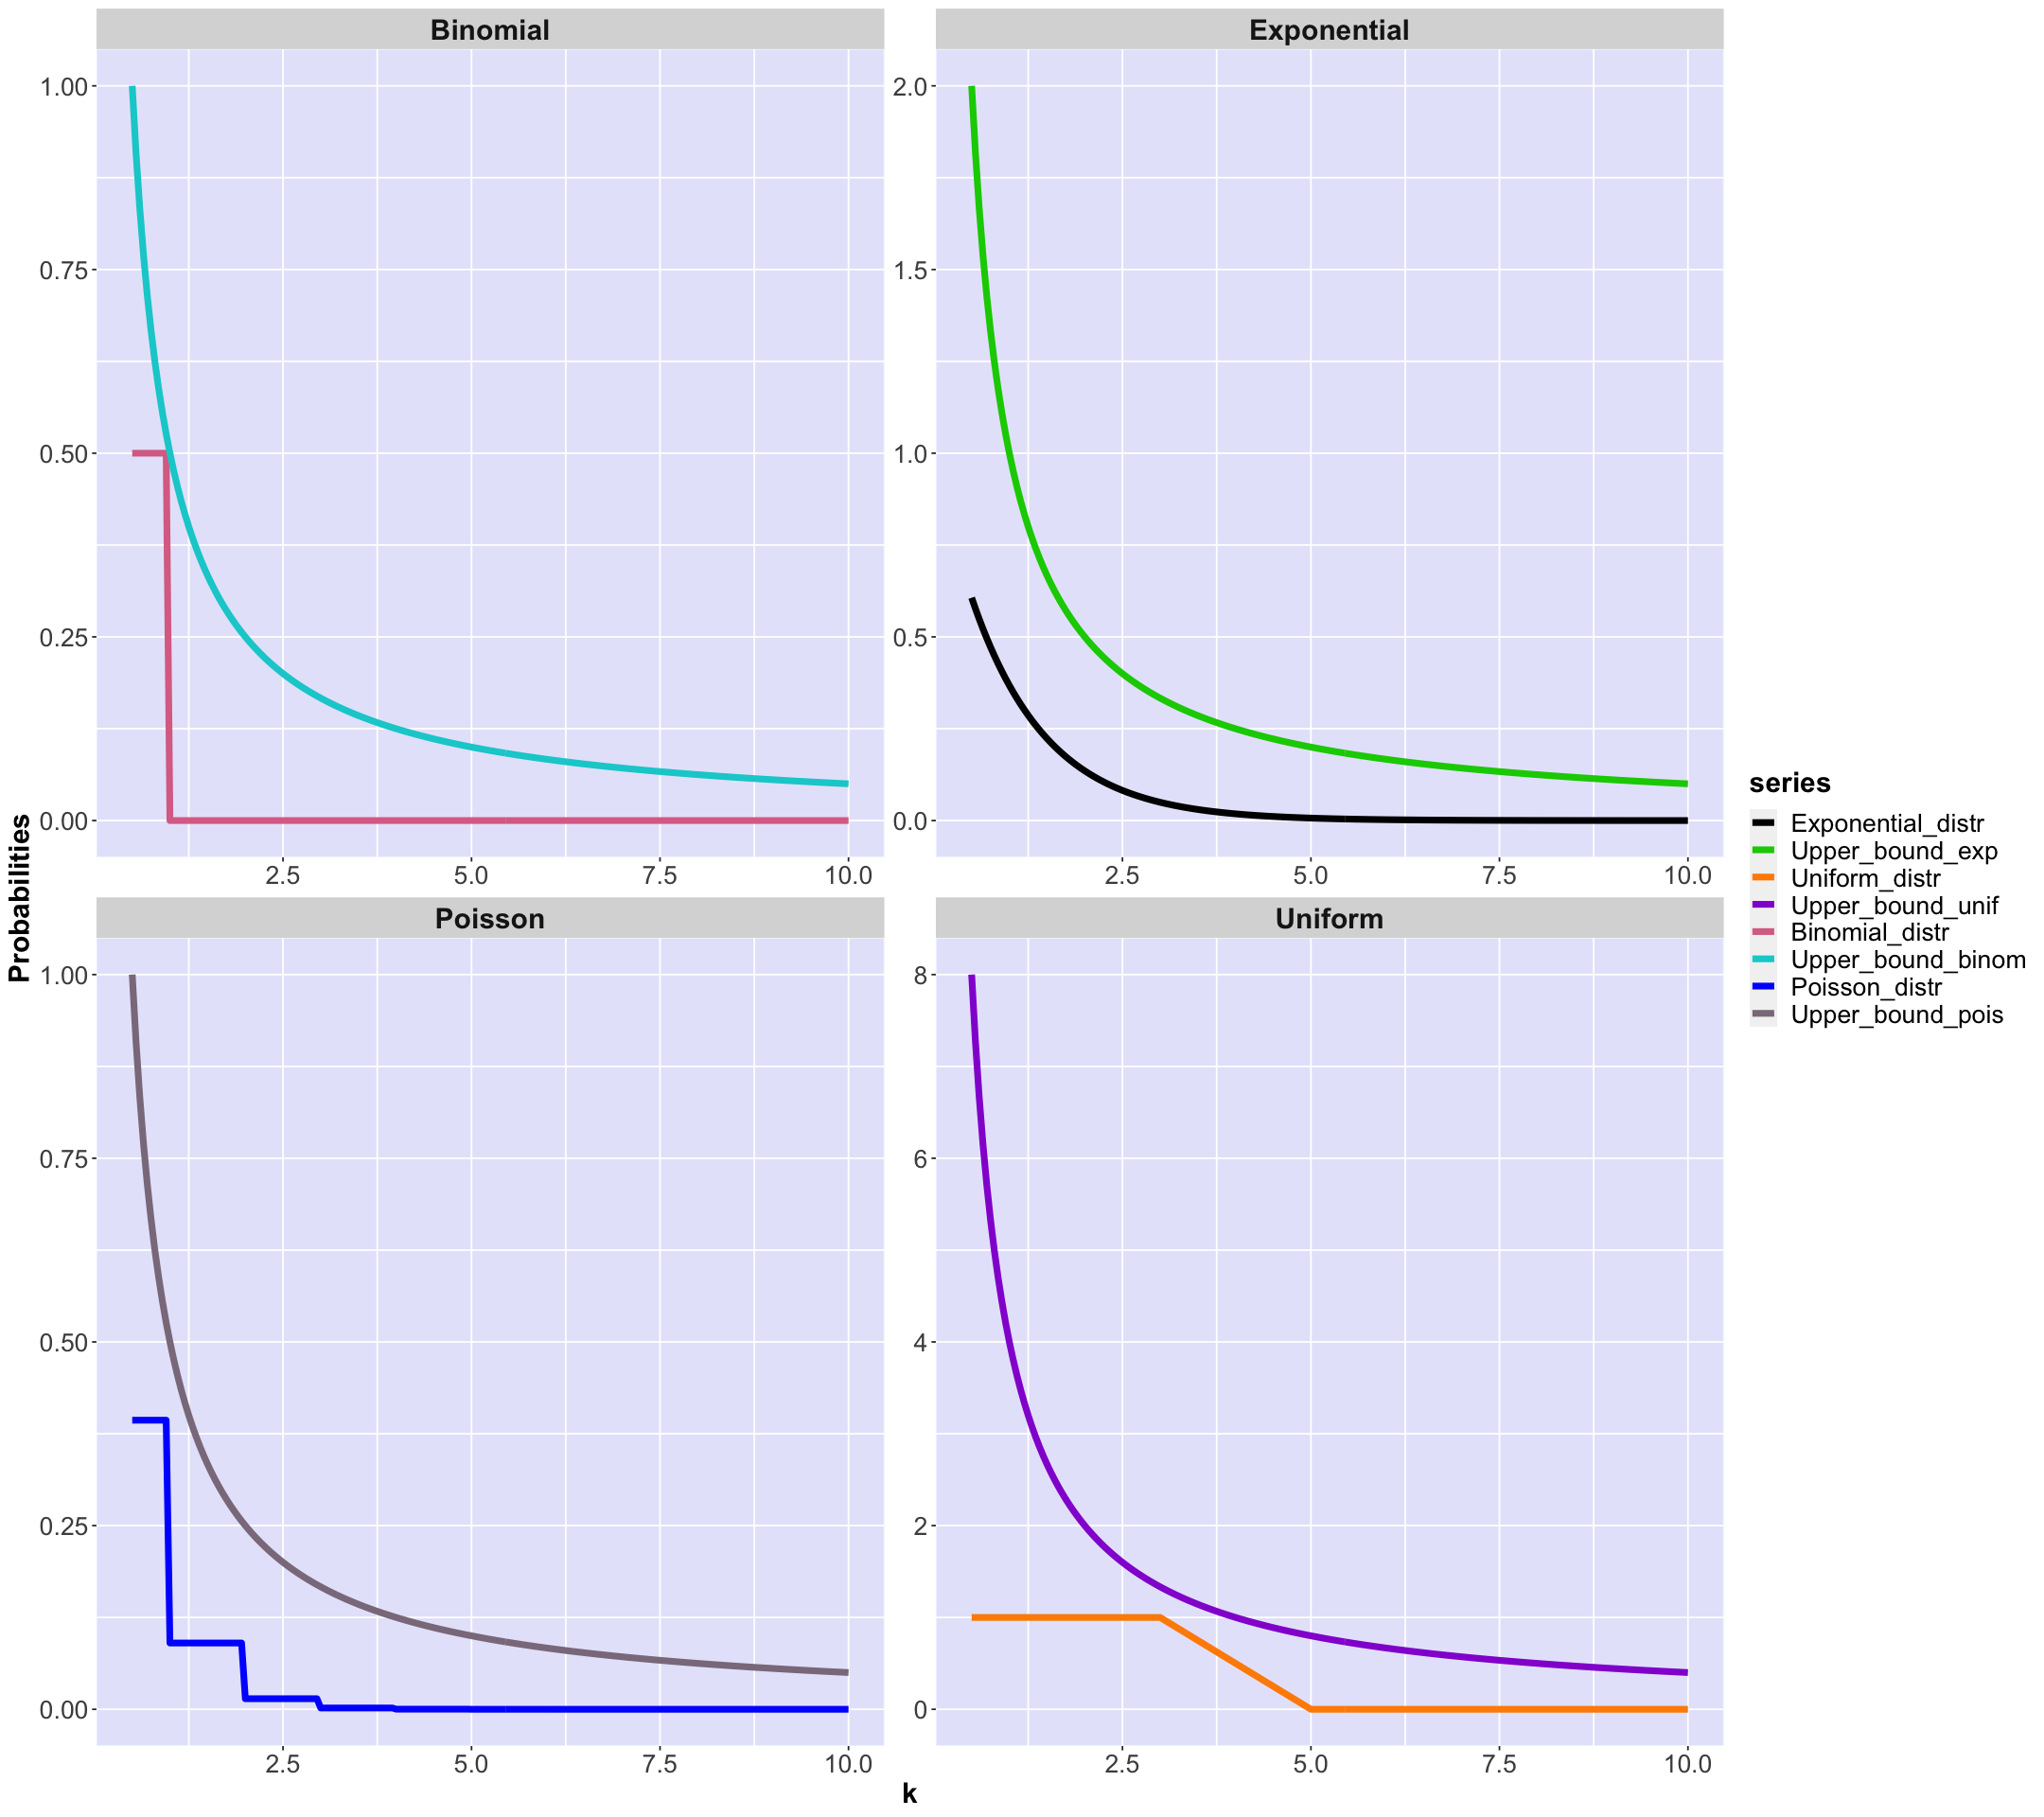

In [15]:
options( repr.plot.width = 18, repr.plot.height = 16 )
my_cols <- c('black','green3','darkorange','darkviolet', 'palevioletred', 'darkturquoise' , 'blue', 'thistle4')
probs <- ggplot(df_plot ) +
            facet_wrap( vars(Probability), scales = 'free', nrow = 2, ncol = 2)+
            scale_colour_manual(values = my_cols)+
            geom_line( aes(x = k, y = value, group= series, colour=series), size = 2 );

layout <- theme( axis.text   = element_text(size=16),
                 axis.title  = element_text(size=18, face="bold"),
                 strip.text  = element_text(size=18, face="bold"),
                 legend.title = element_text(size=18, face="bold"), 
                 legend.text = element_text(size=16),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "aliceblue",
                 size   = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels   <- labs( y = "Probabilities",
                    x = "k")

probs    <- probs + layout + labels
probs

## Exercise 3 - Chebyshev’s inequality
Chebyshev’s inequality tell us that
$$
P(∣X − μ∣ ≥ kσ) ≤ \frac{1}{k^2}
$$

Which can also be written as
$$
P(∣X − μ∣ < kσ) ≥ 1 − \frac{1}{k^2}
$$
Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the
following distributions:

- a) a normal distribution, N(μ = 3, σ = 5)
- b) an exponential distribution, Exp(λ = 1)
- c) a uniform distribution U (1 − √2, 1 + √2)
- d) a Poisson, Pois(λ = 1/3), distribution function

In [16]:
step = 0.01
k <- seq(1, 10-step , step) 


Normal_distr    <- c(1 - pnorm(3+ (k*5), mean = 3, sd = 5) + pnorm(3 -(k*5) , mean = 3, sd = 5))
    
# sigma = expected value = 1/lambda = 1
Exponential_distr <- c(1 - pexp(1+ (k*1) , 1 ) + pexp(1-(k*1), 1 ))

# sigma = sqrt(mu)= 1/sqrt(3)
Poisson_distr     <- c(1 - ppois((1/3)+(k/sqrt(3)), 1/3)  + ppois((1/3)-(k/sqrt(3)), 1/3))

max <- 1+sqrt(2) 
min <- 1-sqrt(2)
mu  <- (max+min)/2
s   <- (max-min)/sqrt(12)

Uniform_distr     <- c( 1 - punif(mu+(s*k), min, max ) + punif(mu-(s*k), min, max ))

Upper_bound       <- c(1/( k*k ))




In [17]:
Chebyshev_df <- data.frame( k, Normal_distr,   Exponential_distr, 
                         Uniform_distr, Poisson_distr, Upper_bound)

df_plot <- melt( Chebyshev_df ,  id.vars = c('k', 'Upper_bound'), variable.name = 'series')


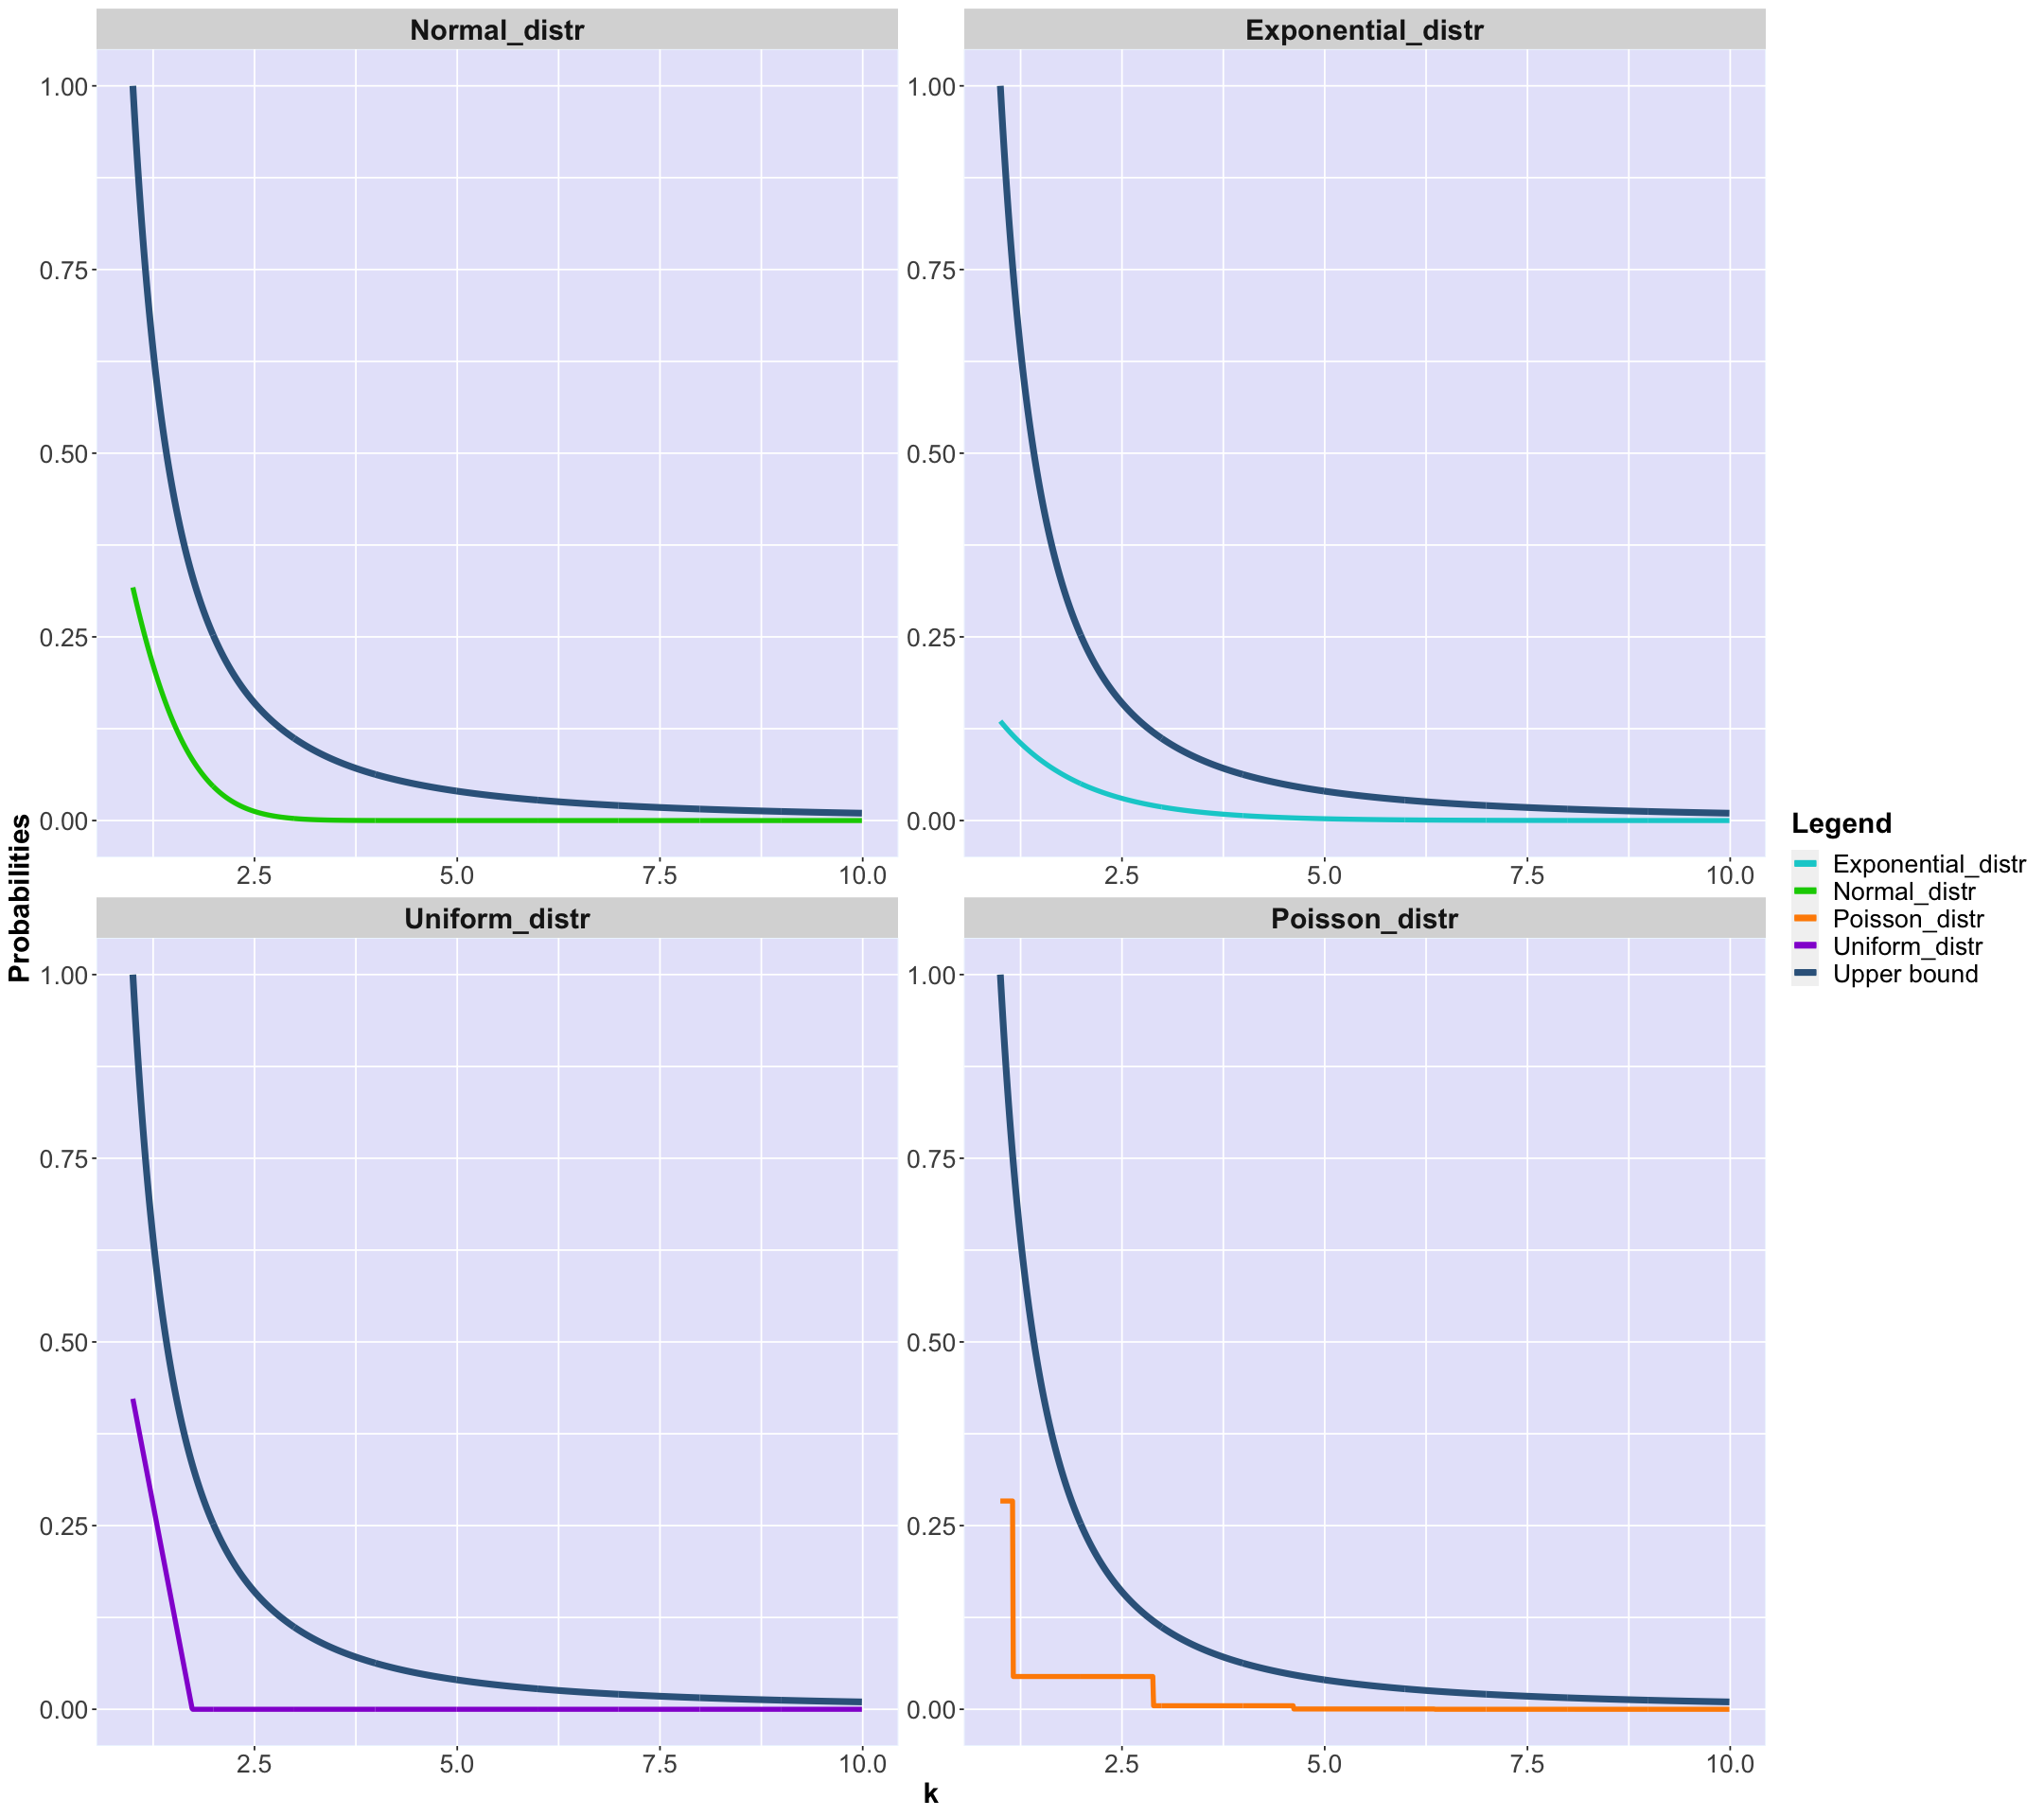

In [18]:
options( repr.plot.width = 18, repr.plot.height = 16 )
my_cols <- c('darkturquoise','green3','darkorange','darkviolet', 'steelblue4')
probs <- ggplot(df_plot ) +
            geom_line( aes(x = k, y = value, color = series), size = 1.5 )+
            geom_line( aes(x = k, y = Upper_bound, color = 'Upper bound'),  size = 2 )+
            scale_colour_manual(values = my_cols)+
            facet_wrap( vars(series), scales = 'free', nrow = 2, ncol = 2);

labels   <- labs( y = "Probabilities",
                  x = "k",
              color = "Legend")

probs    <- probs + layout + labels
probs

## Exercise 4 - Six Boxes Toy Model: inference

- Six boxes toy model.
- Labeling the boxes as follows:

    - H0: 5 black, 0 white
    - H1: 4 black, 1 white
    - H2: 3 black, 2 white
    - H3: 2 black, 3 white
    - H4: 1 black, 4 white
    - H5: 0 black, 5 white
    
Write a program in R that:
1) allows the user to insert the color of a randomly extracted box and

2) prints on the standard output the probability of selecting each box

3) plots the probability for each box as a function of the extraction step

In [19]:
# plotting function

plot_p <- function(df = df){
    
    # add index (posso togliere l'index)
    df_plot <- df
    df_plot$index <- 1:nrow(df_plot)

    #melt data frame into long format
    df_plot <- melt(df_plot ,  id.vars = 'index', variable.name = 'series')
    df_plot<-df_plot[!(df_plot$value =="E"),]
    df_plot<-df_plot[!(df_plot$series == "E"),]
    
    options( repr.plot.width = 16, repr.plot.height = 16 )
    probs <- ggplot(df_plot, aes(x = index, y = value)) +
                geom_point( size = 3 ) +
                facet_wrap( vars(series), scales = 'free', nrow = 4, ncol = 2);
                
    layout <- theme( axis.text   = element_text(size=16),
                 axis.title  = element_text(size=18, face="bold"),
                 strip.text  = element_text(size=18, face="bold"),
                 legend.title = element_text(size=18, face="bold"), 
                 legend.text = element_text(size=16),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "aliceblue",
                 size   = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

    labels   <- labs( y = "Probabilities",
                      x = "Trials")

    probs    <- probs + layout + labels
    
    return(probs)
    }

In [20]:
Extracted <- function(df = df, type){
    
    df <- rbind( df, type )
    x  <- df %>% count(E)

    Pwhite <- c(0, 1/5, 2/5, 3/5, 4/5, 5/5)
    Pblack <- 1 - Pwhite
    
    switch(type,        
        w={        
            nw <- x$n[x$E == type] 
            nb <- nrow(df) - nw - 1
                },
        b={
            nb <- x$n[x$E == type]    
            nw <- nrow(df) - nb - 1
        },
        {
           #Default
            print('ERROR: INSERT only "b" or "w".')
            break
        }
        )
    
    P <- (Pwhite^nw*Pblack^nb)/sum(Pwhite^nw*Pblack^nb) 
    df[nrow(df),] <- c(type, round(P, 3))

    
    return(df)
    }



In [21]:
# create dataframe

Create_df  <- function(){
    df <- data.frame( E  = c('/'), H0 = c(round(1/6, 3)), H1= c(round(1/6, 3)), 
                  H2 = c(round(1/6, 3)), H3 = c(round(1/6, 3)), H4 = c(round(1/6, 3)), 
                  H5 = c(round(1/6, 3)))
    return(df)
}


df <- Create_df()

E,H0,H1,H2,H3,H4,H5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
/,0.167,0.167,0.167,0.167,0.167,0.167
b,0.333,0.267,0.2,0.133,0.067,0


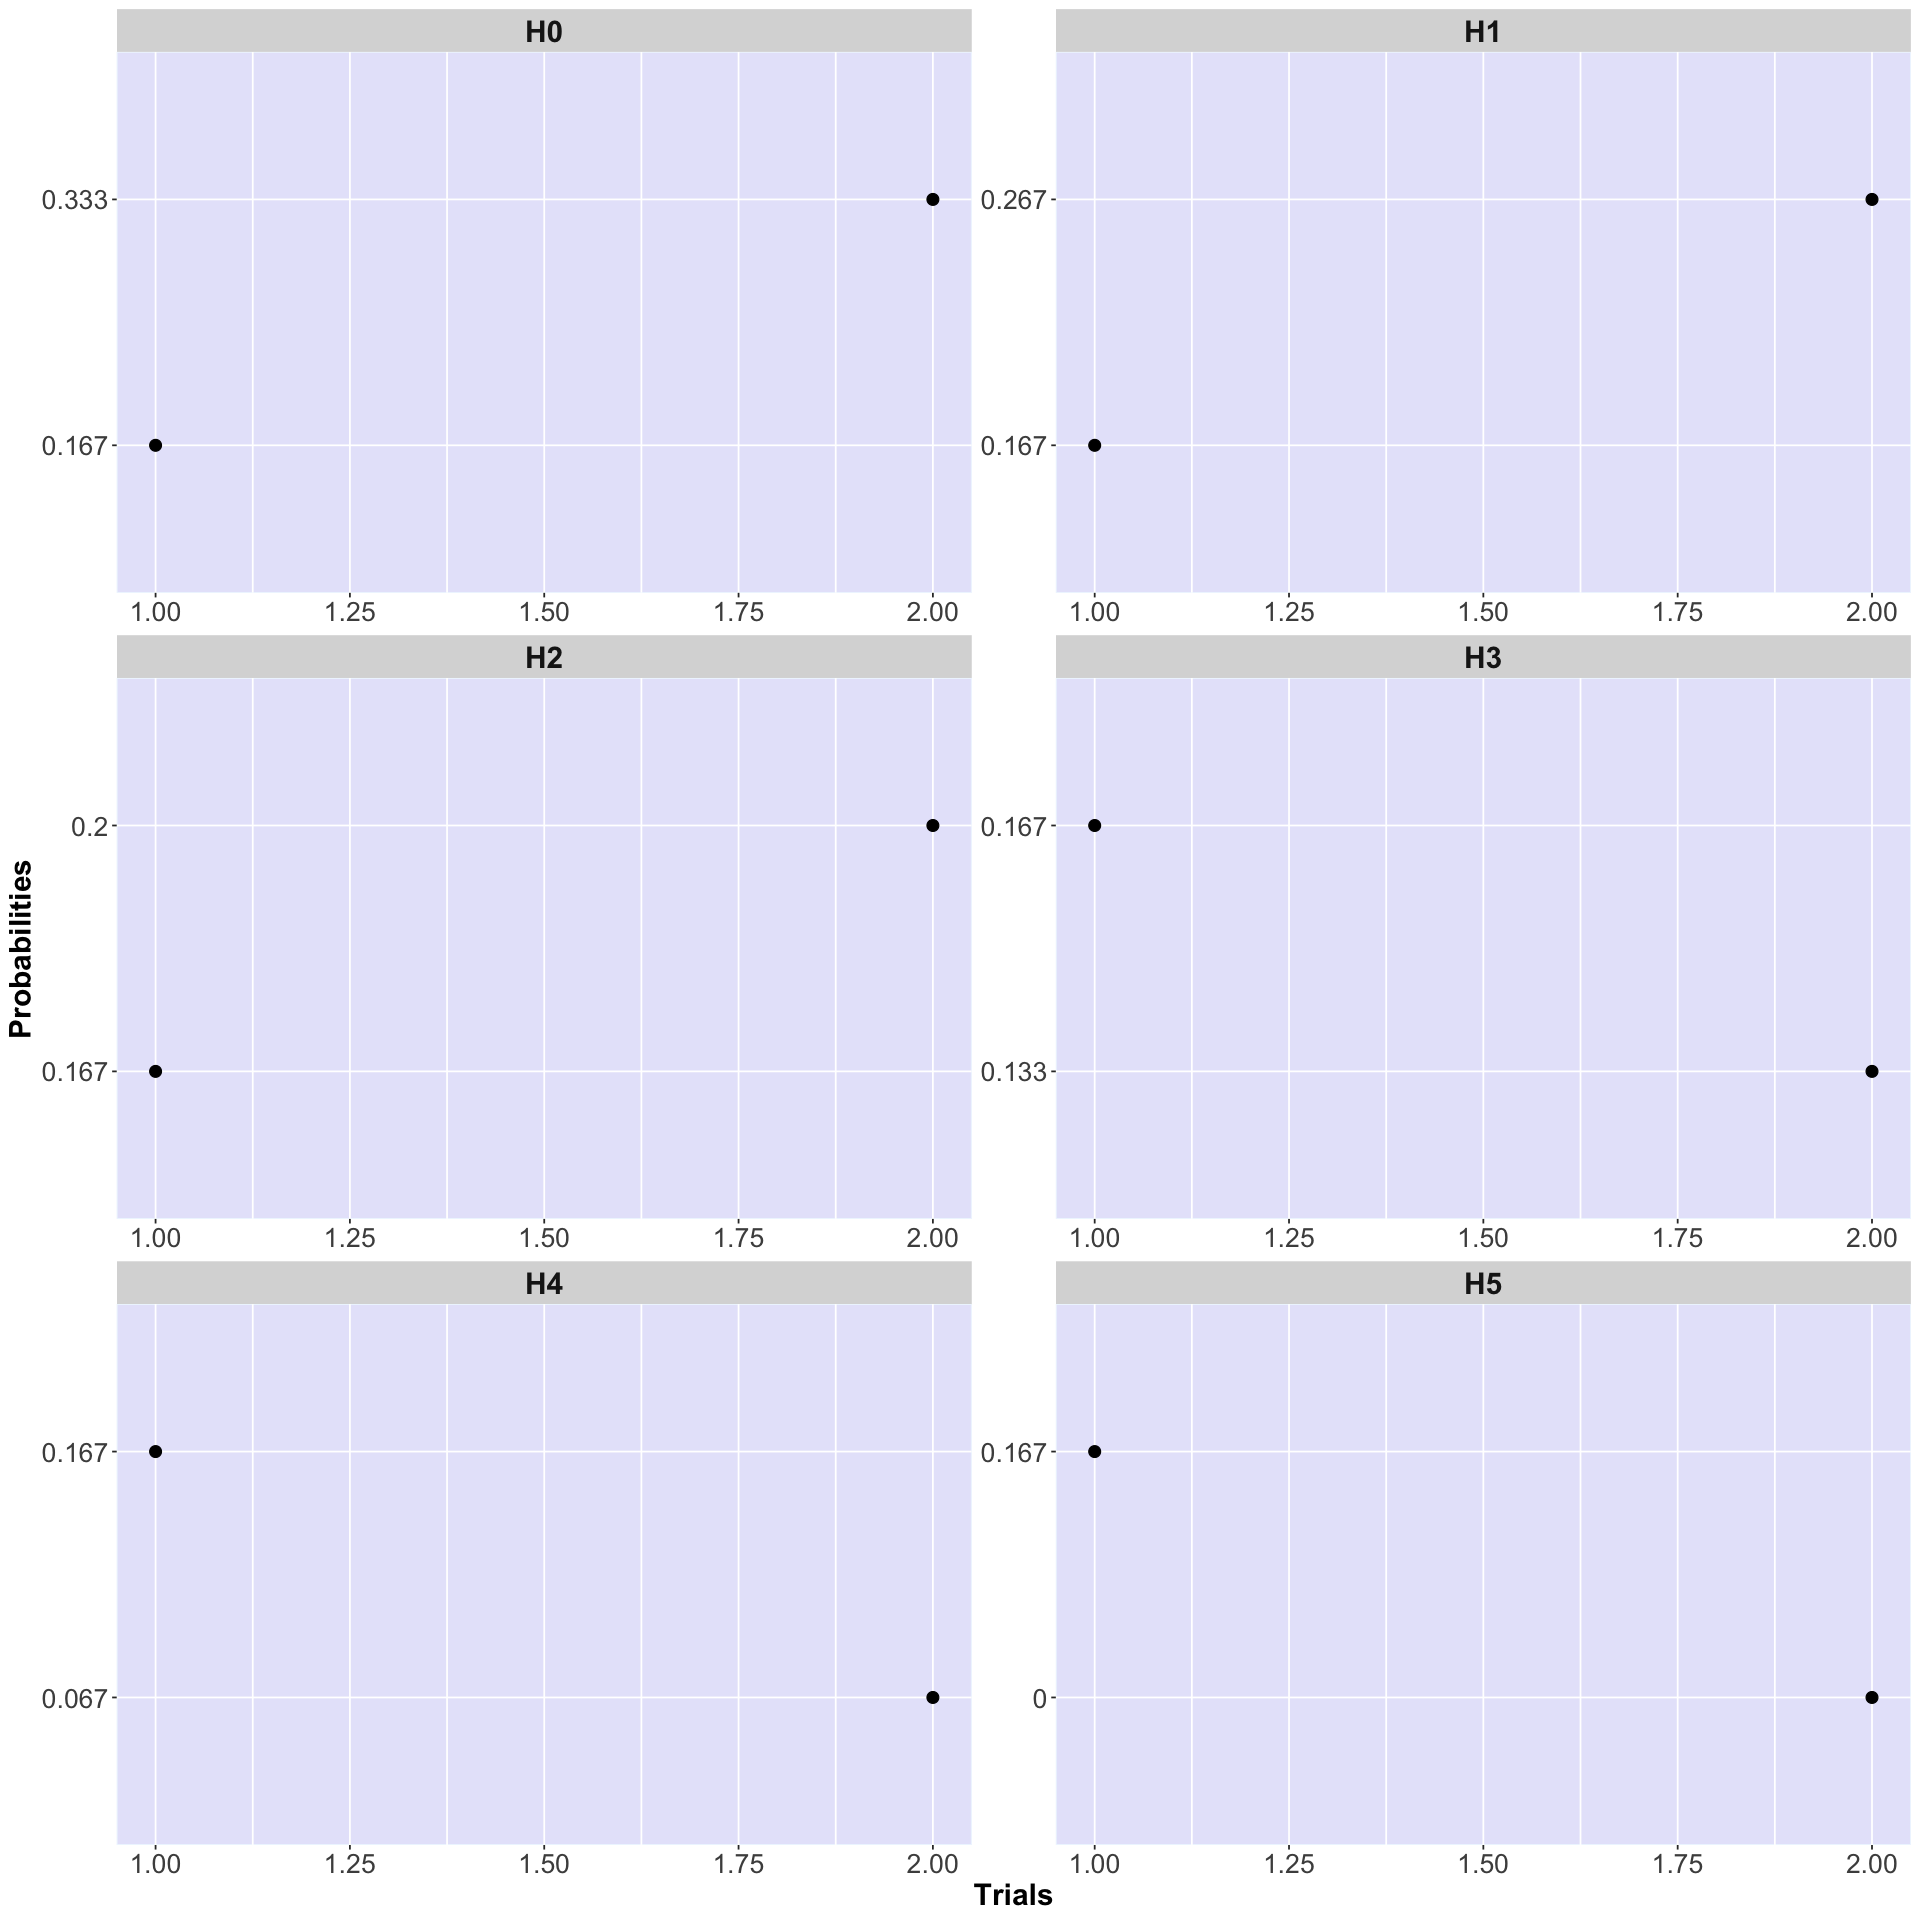

In [22]:
# try the program
df <- Extracted(df, 'b')
df
plot_p(df)


## Exercise 5 - Six Boxes Toy Model: simulation
Consider again the six boxes toy model of the previous exercise and write a simulation
program that:
1) selects a random box

2) makes random sampling from the box

3) prints on the standard output the probability of selecting each box

4) plots the probability for each box as a function of the number of trials

In [23]:
Select <- function(){
    # choosing the box
    boxes   <- c('H0', 'H1', 'H2', 'H3','H4','H5' )
    sel_box <- sample (boxes, size = 1)
    return( sel_box )
    }

Sampling <- function(type){
        
        switch(type,        
        H0={   
            BOX <-c('b', 'b', 'b', 'b', 'b')
            },
        H1={
            BOX <-c('w', 'b', 'b', 'b', 'b')
            },
        H2={    
            BOX <-c('w', 'w', 'b', 'b', 'b')
            },
        H3={  
            BOX <-c('w', 'w', 'w', 'b', 'b')
            },
        H4={  
            BOX <-c('w', 'w', 'w', 'w', 'b')
            },
        H5={    
            BOX <-c('w', 'w', 'w', 'w', 'w')
            }
        )
    
    color <- sample(BOX, size = 1)
    return(color)
}


In [24]:
# Create df anche choose a box
df  <- Create_df()
box <- Select()

E,H0,H1,H2,H3,H4,H5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
/,0.167,0.167,0.167,0.167,0.167,0.167
b,0.333,0.267,0.2,0.133,0.067,0


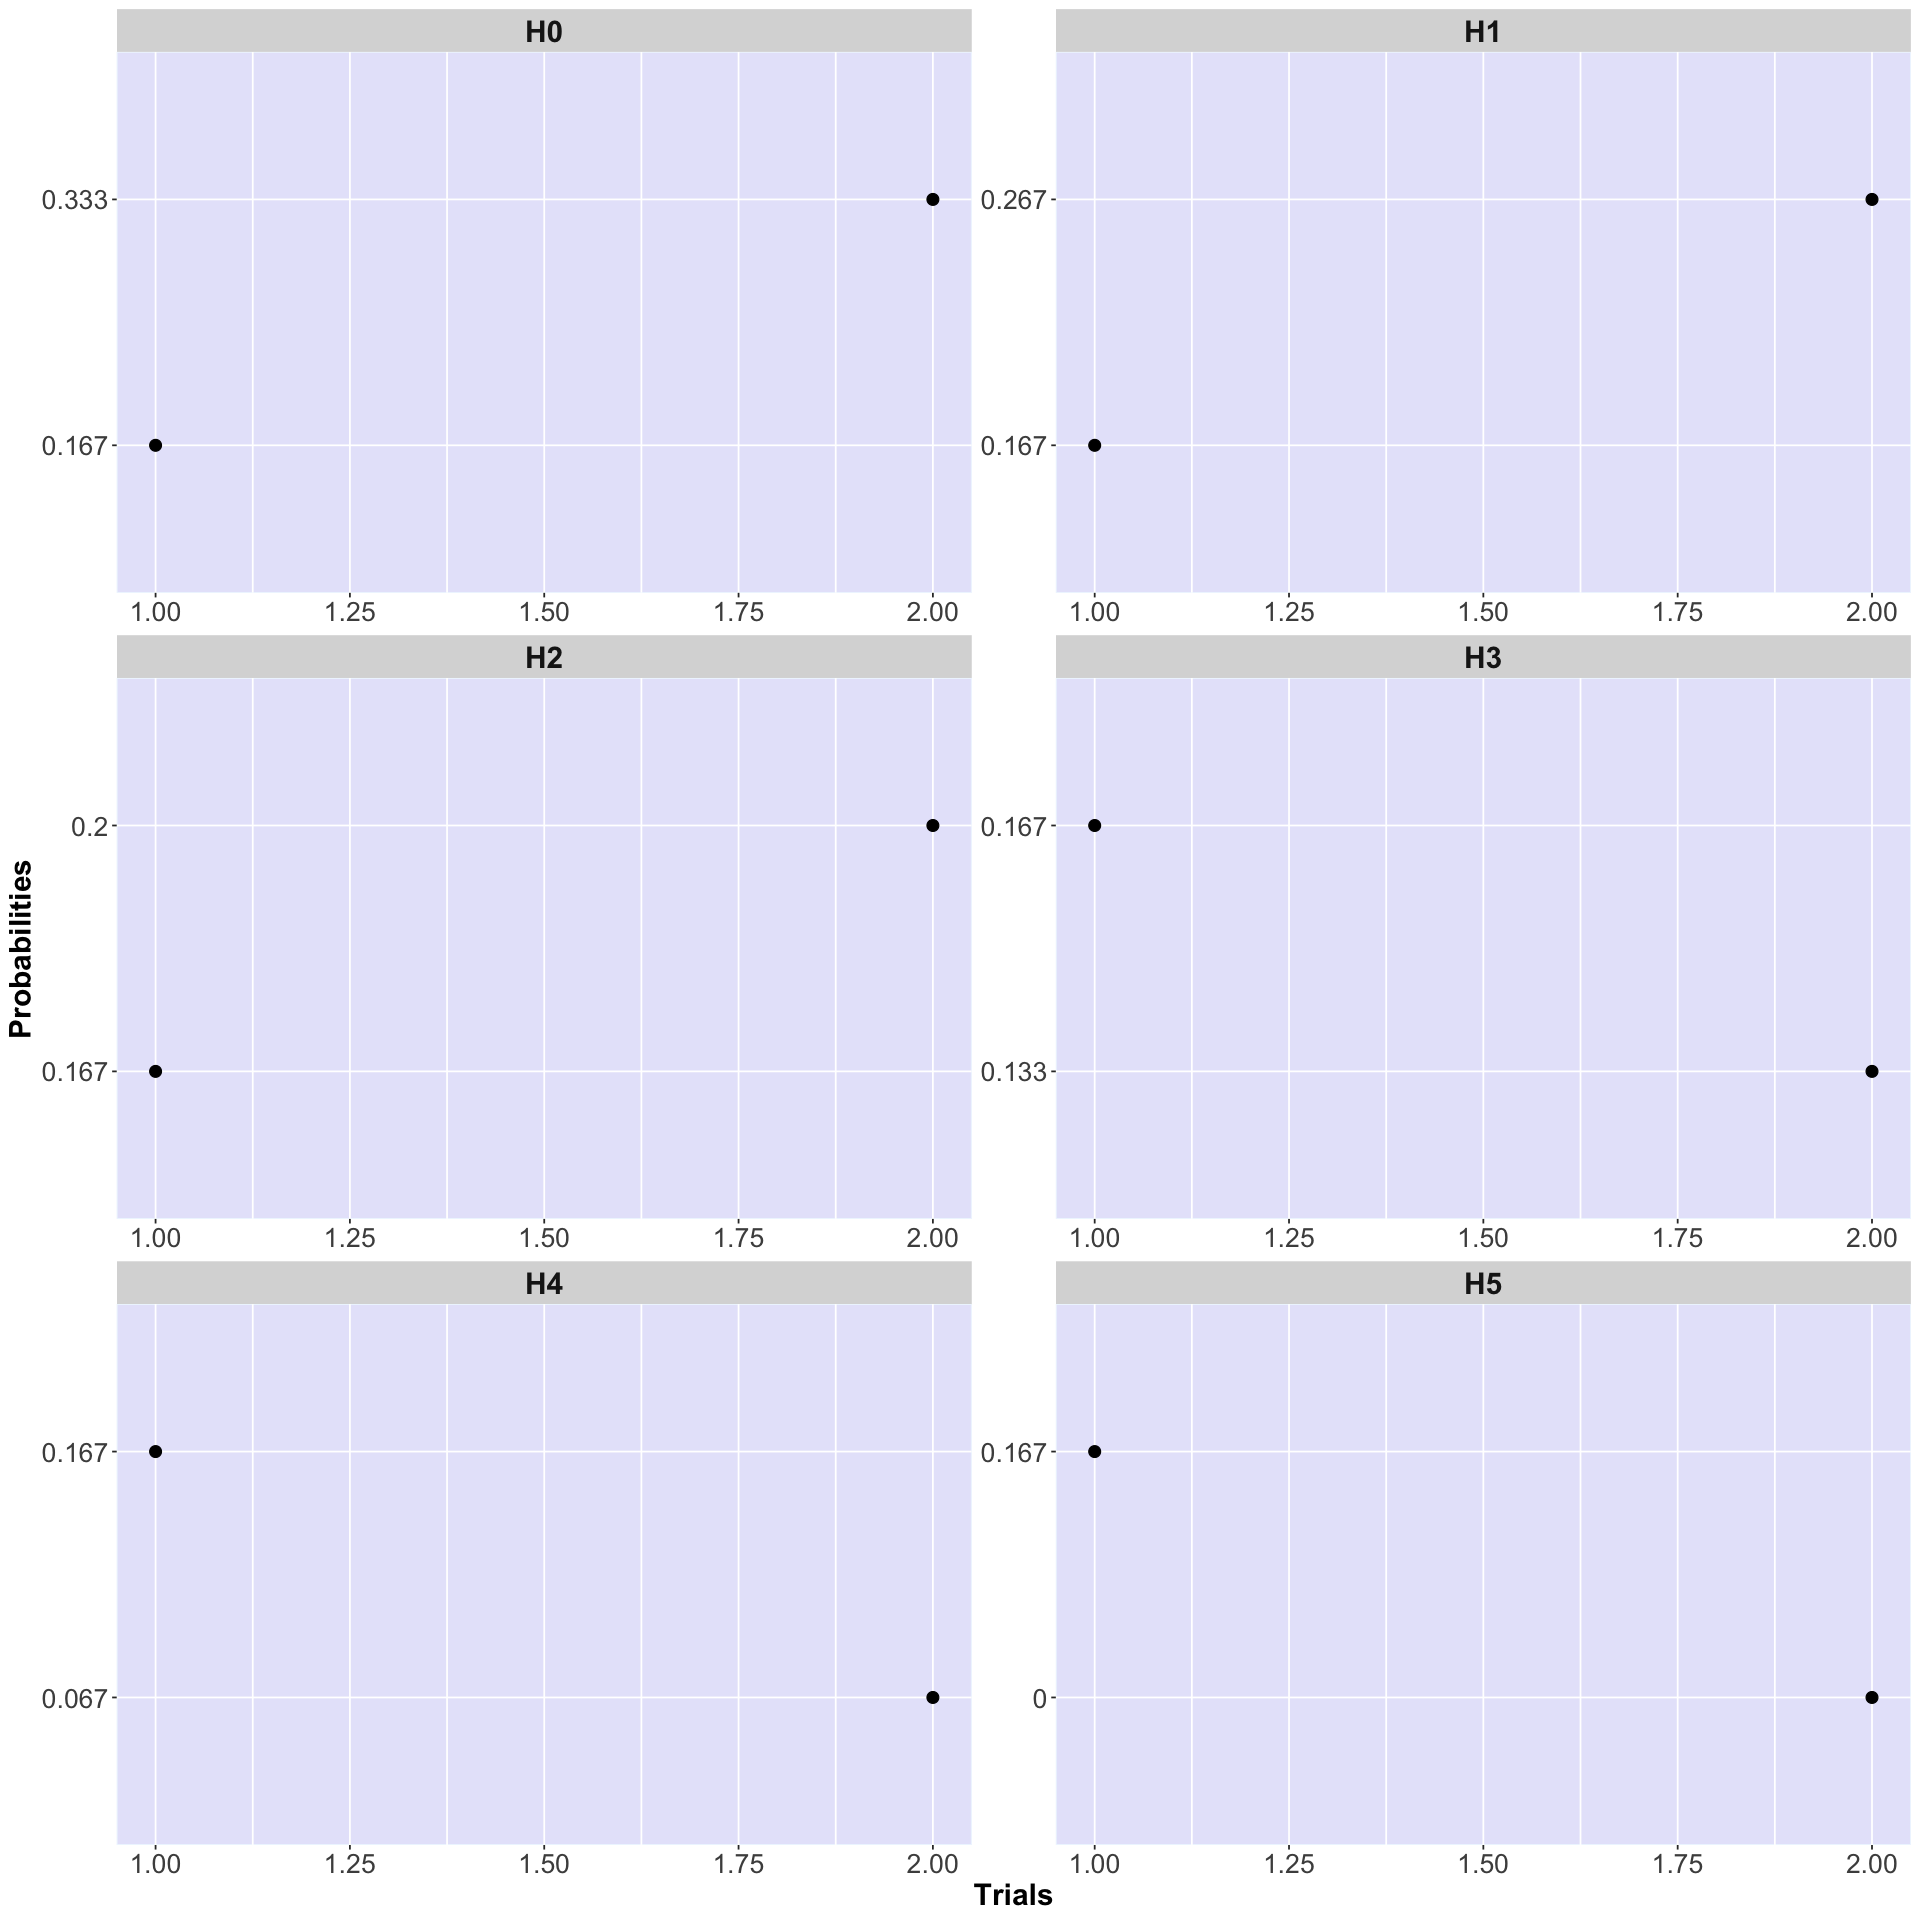

In [25]:
# try the program:
s   <- Sampling(box)
df  <- Extracted(df, s)
plot_p(df)
df


In [26]:
# Write a function that does it automatically
run <- function(Ntrials){
    df  <- Create_df()
    box <- Select()
    df
    i <- 1
    while (i < Ntrials) {
    s   <- c(Sampling(box))
    df  <- Extracted(df, s)
    i = i+1
    }

    return(plot_p(df))
}

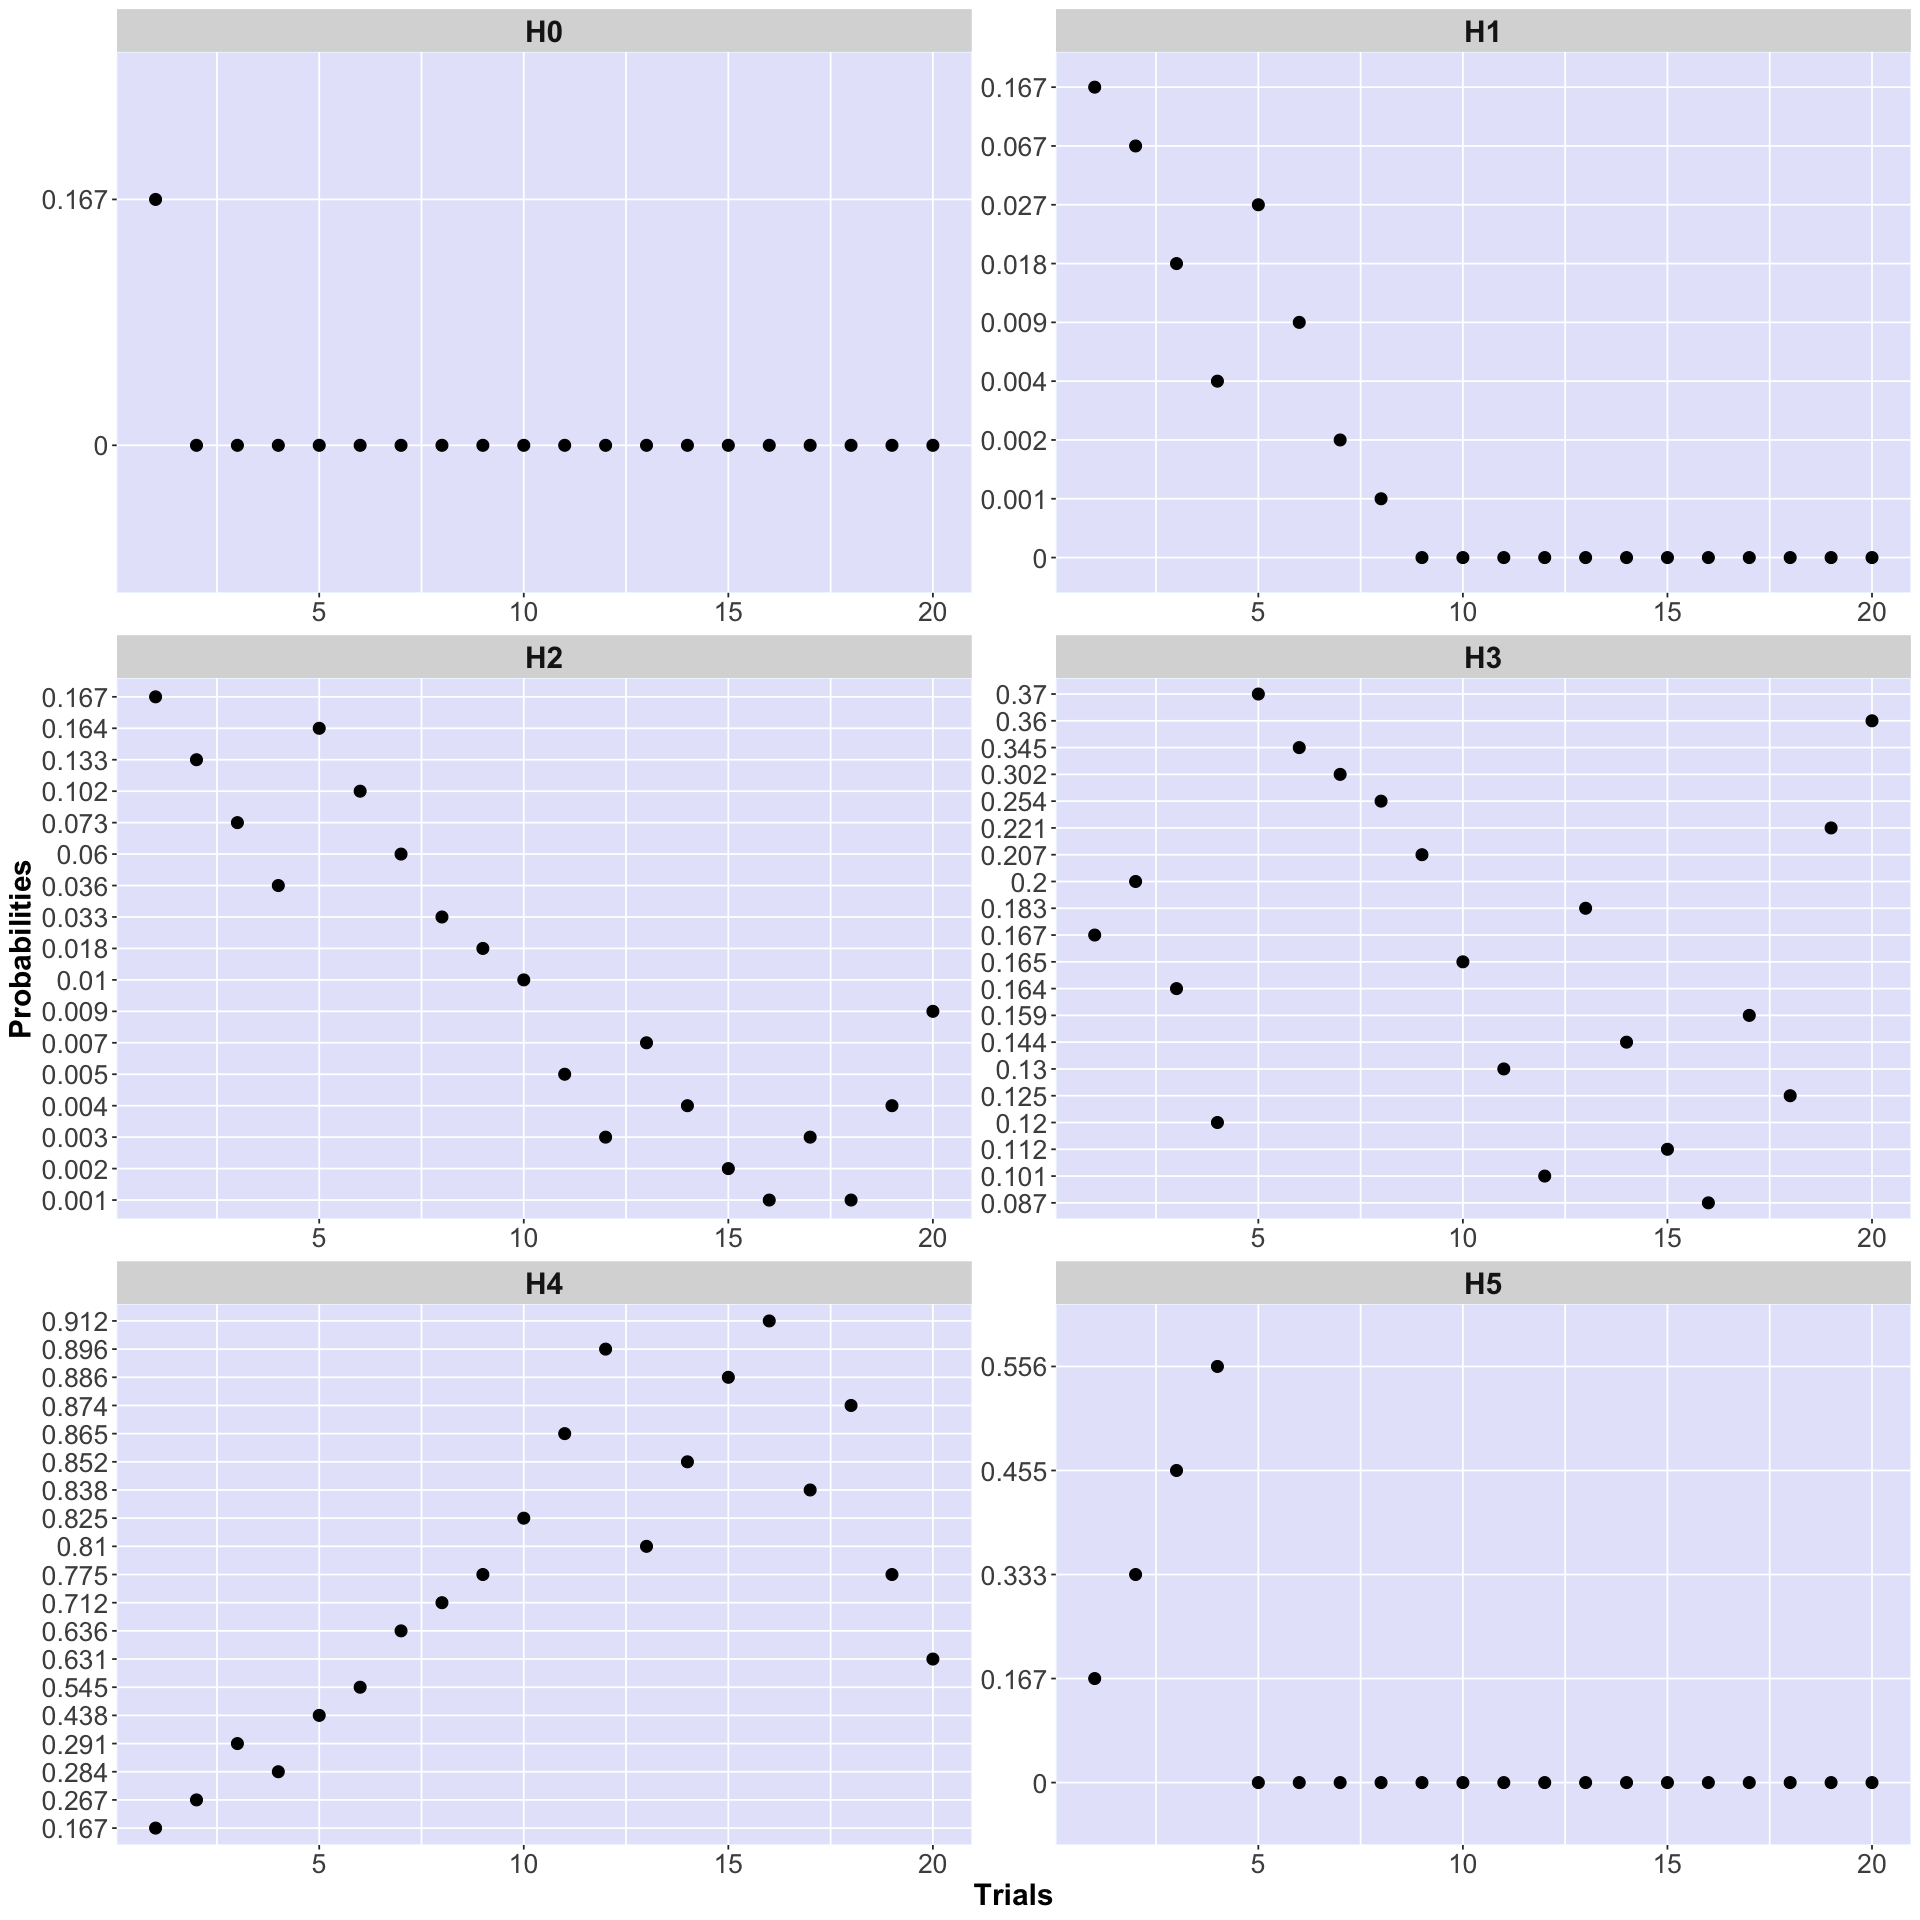

In [28]:
sim <- run(20)
sim